#### Binary classification

In [2]:
import pandas as pd
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
print(f'train_shape = {train.shape}')
print(f'test_shape = {test.shape}')

train_shape = (891, 12)
test_shape = (418, 11)


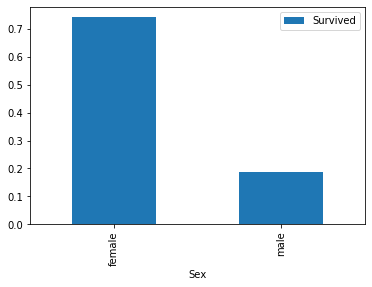

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()

In [4]:
print(train["Age"].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


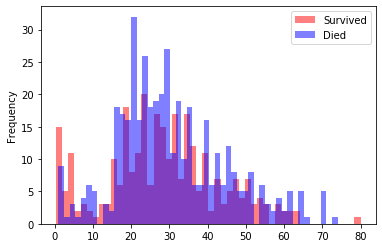

In [5]:
# comparing visually the those that survived vs those who died across different age ranges
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])

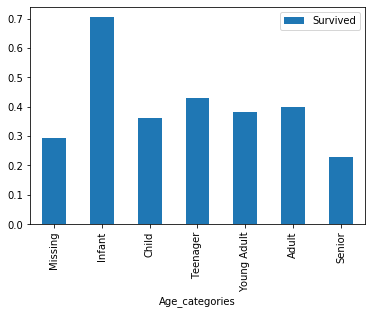

In [6]:
def process_age(df, cut_points, label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels=label_names)
    return df
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant", "Child","Teenager", "Young Adult","Adult","Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)
train_pivot = train.pivot_table(index = "Age_categories", values = "Survived")
train_pivot.plot.bar()

In [7]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
# create dummy columns for the Pclass column
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [9]:
train.shape

(891, 25)

In [10]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# fit and predict on the train dataframe by spliting it into traina and test sets.
holdout = test 
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

In [12]:
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8100558659217877


In [13]:
# test accuracy using k-fold cross validation
from sklearn.model_selection import cross_val_score
import numpy as np
lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv =10)
accuracy = np.mean(scores)
print(scores)
print(f'accuracy = {accuracy}')

[0.8        0.81111111 0.7752809  0.87640449 0.80898876 0.78651685
 0.76404494 0.76404494 0.83146067 0.80681818]
accuracy = 0.8024670865963002


In [14]:
#  train final model and make predictions on unseen holdout data
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])

In [40]:
# create submission file
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission.csv",index=False)

#### cleaning the features 

In [16]:
train.shape

(891, 25)

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior'],
      dtype='object')

In [18]:
columns = ['SibSp','Parch','Fare','Cabin','Embarked']
print(train[columns].describe(include='all',percentiles=[]))

             SibSp       Parch        Fare    Cabin Embarked
count   891.000000  891.000000  891.000000      204      889
unique         NaN         NaN         NaN      147        3
top            NaN         NaN         NaN  B96 B98        S
freq           NaN         NaN         NaN        4      644
mean      0.523008    0.381594   32.204208      NaN      NaN
std       1.102743    0.806057   49.693429      NaN      NaN
min       0.000000    0.000000    0.000000      NaN      NaN
50%       0.000000    0.000000   14.454200      NaN      NaN
max       8.000000    6.000000  512.329200      NaN      NaN


In [19]:
from sklearn.preprocessing import minmax_scale
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())
train["Embarked"] = train["Embarked"].fillna("S")
holdout["Embarked"] = holdout["Embarked"].fillna("S")

train = create_dummies(train,"Embarked")
holdout = create_dummies(holdout,"Embarked")

train["SibSp_scaled"] = minmax_scale(train["SibSp"])
train["Parch_scaled"] = minmax_scale(train["Parch"])
train["Fare_scaled"] = minmax_scale(train["Fare"])
holdout["SibSp_scaled"] = minmax_scale(holdout["SibSp"])
holdout["Parch_scaled"] = minmax_scale(holdout["Parch"])
holdout["Fare_scaled"] = minmax_scale(holdout["Fare"])

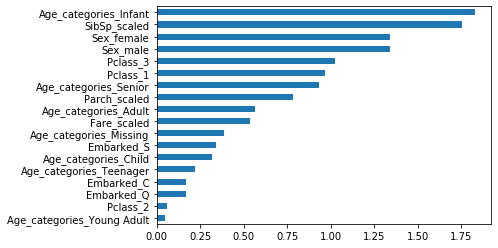

In [20]:
# select best-performing features
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']
lr = LogisticRegression(solver='lbfgs')
lr.fit(train[columns], train["Survived"])
coefficients = coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0],
                               index=columns)
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()

In [21]:
# train a new model with the top 8 scores
from sklearn.model_selection import cross_val_score

columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']
lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, train[columns], train["Survived"], cv=10)
accuracy = scores.mean()
print(accuracy)

0.8148019521053229


In [22]:
all_X = train[columns]
all_y = train['Survived']
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[columns])
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_1.csv",index=False) 

#### Improve accuracy using Feature Engineering

In [25]:
# binning fare column
def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]

train = process_fare(train,cut_points,label_names)
holdout = process_fare(holdout,cut_points,label_names)

train = create_dummies(train,"Fare_categories")
holdout = create_dummies(holdout,"Fare_categories")

In [24]:
# extracting data from text columns
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)
train["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [26]:
holdout["Title"] = extracted_titles.map(titles)

train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

holdout["Cabin_type"] = holdout["Cabin"].str[0]
holdout["Cabin_type"] = holdout["Cabin_type"].fillna("Unknown")

for column in ["Title","Cabin_type"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)

In [27]:
train.shape

(891, 57)

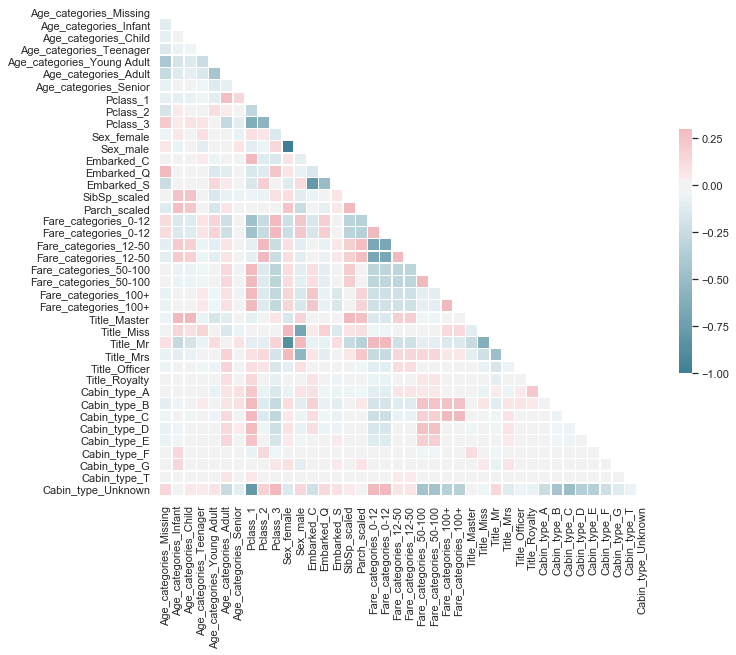

In [29]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns]) 

In [35]:
# use feature_selection.RFECV class to perform recursive feature elimination with cross-validation
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]
lr = LogisticRegression(solver='lbfgs')
selector = RFECV(lr,cv=10)
selector.fit(all_X,all_y)
optimized_columns = all_X.columns[selector.support_]
optimized_columns

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

In [41]:
all_X = train[optimized_columns]
all_y = train["Survived"]
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = scores.mean()
print(f'accuracy = {accuracy}')

accuracy = 0.8226549199863807


In [42]:
lr.fit(all_X, all_y)
holdout_predictions = lr.predict(holdout[optimized_columns])

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_2.csv",index=False)

#### Model Selection and Tuning

In [47]:
train = pd.read_csv("train_modified.csv")
holdout = pd.read_csv("holdout_modified.csv")
train.head(2)

,Survived,PassengerId,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,...,Title_Royalty,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [48]:
all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy_lr = scores.mean()
print(f'accuracy_lr = {accuracy_lr}')

accuracy_lr = 0.8250025536261492


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = scores.mean()
print(f'accuracy_knn = {accuracy_knn}')

accuracy_knn = 0.7857382816933379


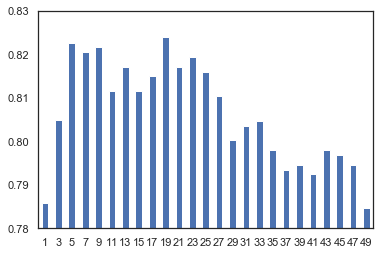

In [52]:
# grid search - searched for the model that gave the highest accuracy
import matplotlib.pyplot as plt

def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(6,4),ylim=(0.78,0.83),rot=0)
    
knn_scores = dict()
for k in range(1,50,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    mean_score = scores.mean()
    knn_scores[k] = mean_score
plot_dict(knn_scores)

In [55]:
# using sklearn's GridSearchCV() class 
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2] # p=1: manhattan_distance; p=2: euclidean_distance
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_
print(f'best_params = {best_params}')
print(f'best_score = {best_score}')

best_params = {'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
best_score = 0.8282828282828283


In [58]:
holdout_no_id = holdout.drop(['PassengerId'],axis=1)
best_knn = grid.best_estimator_
holdout_predictions = best_knn.predict(holdout_no_id)

holdout_ids = holdout['PassengerId']
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv('submission_1.csv', index=False)

#### using random forests

In [68]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
print(f'accuracy_rf = {accuracy_rf}')

accuracy_rf = 0.8070125411417546


In [77]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
 }

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)
grid.fit(all_X, all_y)
best_params = grid.best_params_
best_score = grid.best_score_
print(f'best_params = {best_params}')
print(f'best_score = {best_score}')

best_params = {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
best_score = 0.8428731762065096


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [81]:
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(holdout_no_id)
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId":holdout_ids,
                 "Survived":holdout_predictions}
submission = pd.DataFrame(submission_df)
submission.to_csv("submission_2.csv", index=False)